To accentuate the white matter and gray matter in the brain proton density image, we need to apply two intensity transformations:

White Matter: Typically has a higher intensity range in MRI images.
Gray Matter: Typically has a mid-range intensity.

steps needed:

Step 1: Load the brain image.
Step 2: Apply an intensity transformation to highlight white matter and gray matter.
Step 3: Show intensity transformation plots.

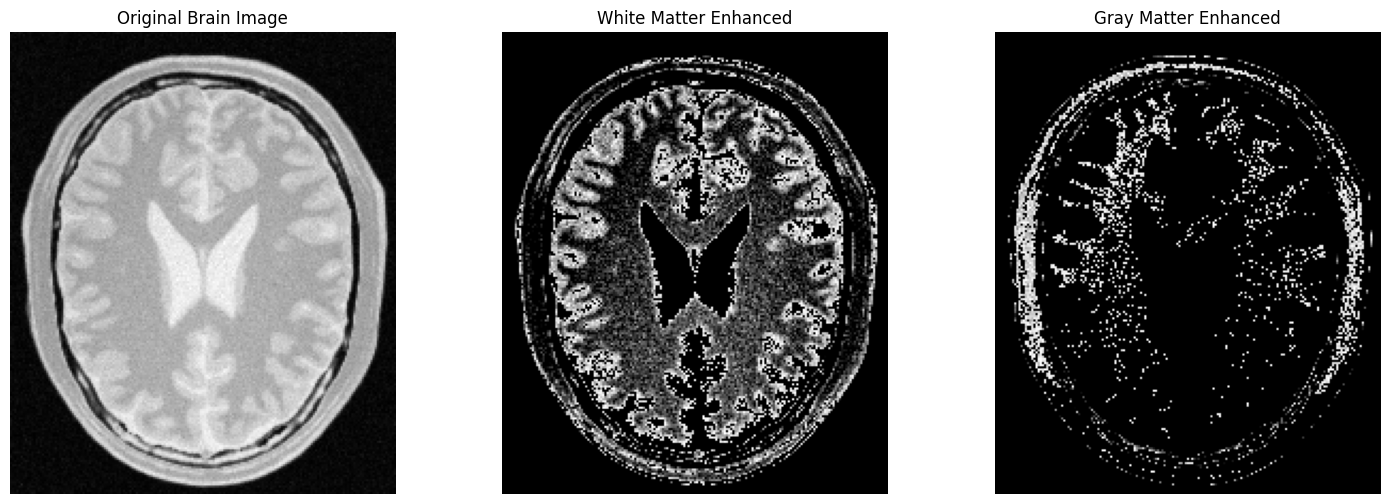

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the brain image
brain_image_path = 'utils/brain_proton_density_slice.png'  # Update with the correct path
brain_image = Image.open(brain_image_path).convert('L')  # Convert to grayscale

# Convert the brain image to a numpy array
brain_image_np = np.array(brain_image)

# Defining approximate intensity ranges for white and gray matter
# White matter is generally in the 160-200 range
# Gray matter is generally in the 110-160 range

# Define the intensity transformation for accentuating white matter
def white_matter_transformation(pixel_value):
    if 160 <= pixel_value <= 200:
        return min(255, int(255 * (pixel_value - 160) / 40))  # Stretch values to the highest contrast
    else:
        return 0  # Suppress other intensities

# Define the intensity transformation for accentuating gray matter
def gray_matter_transformation(pixel_value):
    if 110 <= pixel_value <= 160:
        return min(255, int(255 * (pixel_value - 110) / 50))  # Stretch values to enhance contrast
    else:
        return 0  # Suppress other intensities

# Vectorize both transformation functions
vectorized_white_matter = np.vectorize(white_matter_transformation)
vectorized_gray_matter = np.vectorize(gray_matter_transformation)

# Apply transformations
white_matter_image_np = vectorized_white_matter(brain_image_np).astype(np.uint8)
gray_matter_image_np = vectorized_gray_matter(brain_image_np).astype(np.uint8)

# Convert the numpy arrays back to images
white_matter_image = Image.fromarray(white_matter_image_np)
gray_matter_image = Image.fromarray(gray_matter_image_np)

# Plot the original and transformed images
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original brain image
axes[0].imshow(brain_image_np, cmap='gray')
axes[0].set_title("Original Brain Image")
axes[0].axis('off')

# White matter enhanced
axes[1].imshow(white_matter_image_np, cmap='gray')
axes[1].set_title("White Matter Enhanced")
axes[1].axis('off')

# Gray matter enhanced
axes[2].imshow(gray_matter_image_np, cmap='gray')
axes[2].set_title("Gray Matter Enhanced")
axes[2].axis('off')

plt.show()